In [9]:
import nibabel as nib
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append('../src/')

# custom scripts
from visualization import plot_batch
from helpers import get_fourier_transform
from spiraltrajectory import spiral_samples_trajectory, kspace_measurements_spiral, minimum_energy_reconstruction

from nfft import nfft, ndft
from matplotlib.colors import LogNorm
from numpy.fft import fft2, fftshift

In [2]:
IMG_PATH = '../data/scanVisit__0003__0003/MRI__0001/t2/Native/Original__0001/NIFTI/f0001.img'
HEADER_PATH = '../data/scanVisit__0003__0003/MRI__0001/t2/Native/Original__0001/NIFTI/f0001.hdr'

imgs = nib.load(IMG_PATH)
data = imgs.get_data()
img = data.T[0]

<ipython-input-2-43f7d2574cad>:5: DeprecationWarning:

get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0



## Plot transposed image

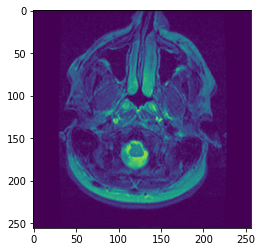

In [3]:
_ = plt.imshow(img)

## 2d Fourier Transform

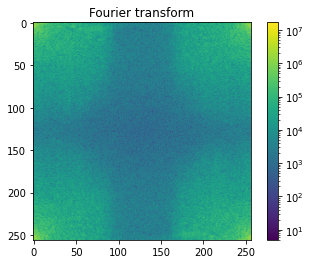

In [4]:
def plot_spectrum(im_fft):
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

im_fft = get_fourier_transform(img, fshift=False, use_absolute=False)
plot_spectrum(im_fft)
_ = plt.title('Fourier transform')

## Inverse 2d Fourier Transform

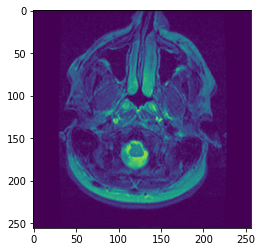

In [5]:
inverse_transform = np.fft.ifft2(im_fft)
# plot_spectrum(inverse_transform)
_ = plt.imshow(np.abs(inverse_transform))

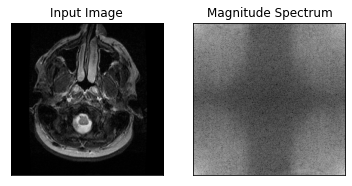

In [6]:
transformed_imgs = [get_fourier_transform(img, use_absolute=True) for img in data.T]

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(transformed_imgs[0], cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Plot Images Batch with Fourier Transforms

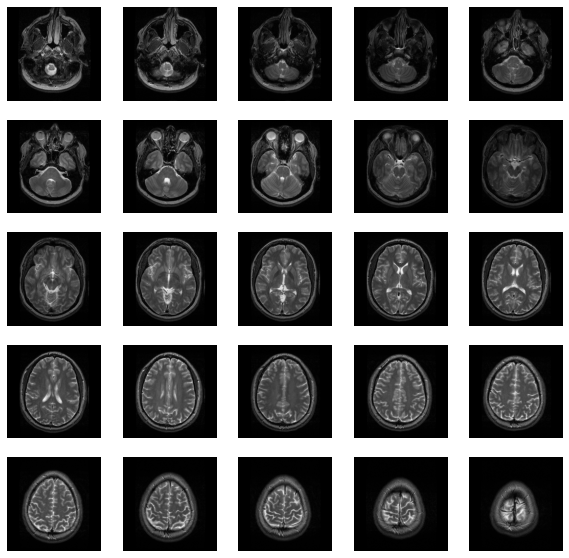

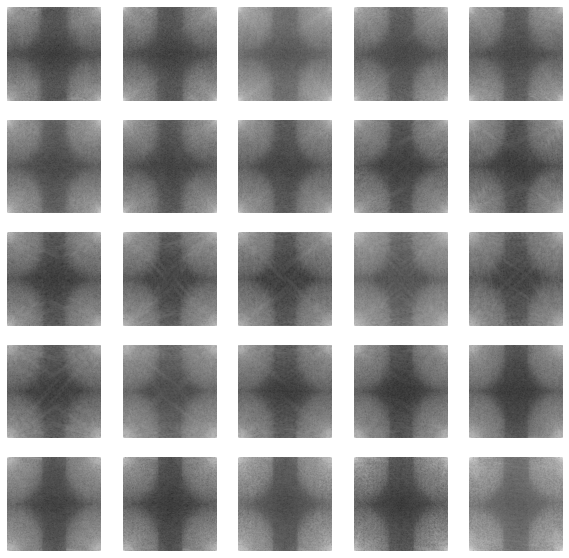

In [7]:
plot_batch(data.T)
plot_batch(transformed_imgs)

## K-space Spiral Trajectory

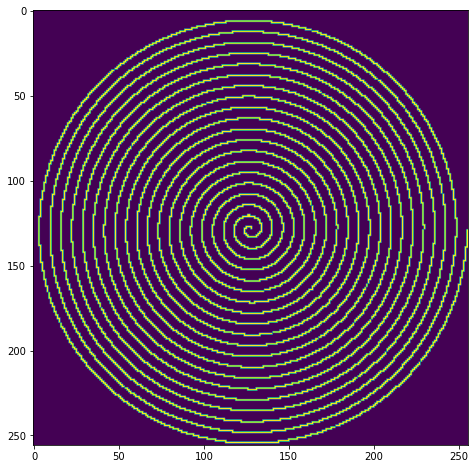

In [8]:
img_size = 256
samples_rows, i, j, I =  spiral_samples_trajectory(width=img_size, height=img_size, n_turns=20)

plt.figure(figsize=(8,8))
_ = plt.imshow(np.fft.fftshift(I))

default de MRI:nuft: non uniform fourier transform

# Get K Space measurements

In [10]:
measurements = kspace_measurements_spiral(img, samples_rows)
measurements.size

10173

# Reconstruct image with minimum energy algorithm

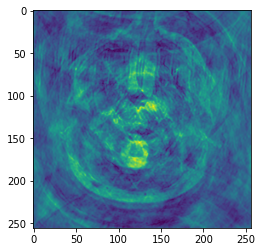

In [11]:
reconstructed_img = minimum_energy_reconstruction(measurements, 256, 256, samples_rows)
_ = plt.imshow(np.abs(reconstructed_img))